# Black Friday 

# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Cleaning and preparing the data for model training

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
sns.set_style("dark")
plt.rcParams['figure.figsize'] = (12, 7)

## Importing the Dataset

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_train.shape

(550068, 12)

In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
df_test.shape

(233599, 11)

In [9]:
df = df_train.append(df_test)

C:\Users\harsh\AppData\Local\Temp\ipykernel_26520\925505788.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df.shape

(783667, 12)

## Data Preprocessing , Exploratory Data Analysis and Feature Scaling

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [13]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
df = df.drop(['User_ID'] , axis = 1)

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [17]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [18]:
pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [19]:
# Handle Categorical feature Gender
df['Gender'] = df['Gender'].map({'F' : 0 , 'M' : 1})

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [21]:
pd.get_dummies(df['Age'])

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
233594,0,0,1,0,0,0,0
233595,0,0,1,0,0,0,0
233596,0,0,1,0,0,0,0
233597,0,0,0,0,1,0,0


In [22]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
 # Handle Categorical feature Age
df['Age'] = df['Age'].map({'0-17' : 1 , '18-25' : 2, '26-35' : 3, '36-45' : 4,'46-50' : 5,  '51-55' : 6  , '55+' : 7})

In [24]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [25]:
# Handle Categorical feature City 
city_df = pd.get_dummies(df['City_Category'] , drop_first=True)

In [26]:
city_df.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [27]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [28]:
df = pd.concat([df , city_df] , axis = 1)

In [29]:
df.drop(['City_Category'] , axis = 1 , inplace = True)

In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


## Missing Values

In [31]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

<Axes: >

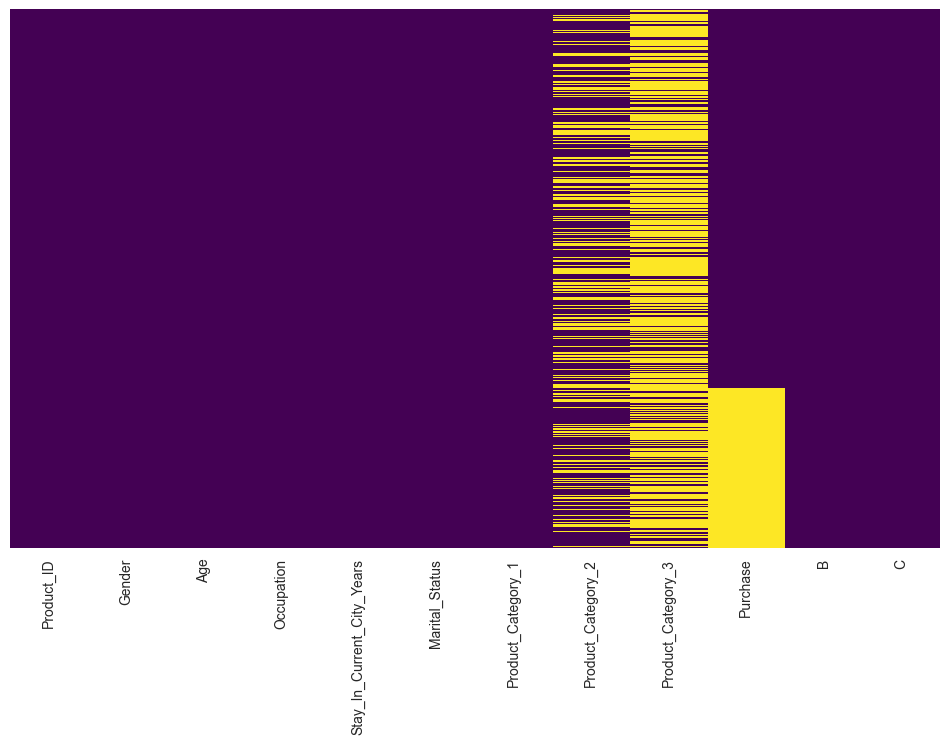

In [32]:
sns.heatmap(df.isnull() , yticklabels=False , cbar = False , cmap = 'viridis')

In [33]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [34]:
# Replace missing Values with Mode
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [35]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [36]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [37]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [38]:
df['Product_Category_3'].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [39]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [40]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [41]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [42]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [43]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+' ,'')

C:\Users\harsh\AppData\Local\Temp\ipykernel_26520\2958411275.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+' ,'')


In [44]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [46]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [48]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


## EDA

C:\Users\harsh\AppData\Local\Temp\ipykernel_26520\445204377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


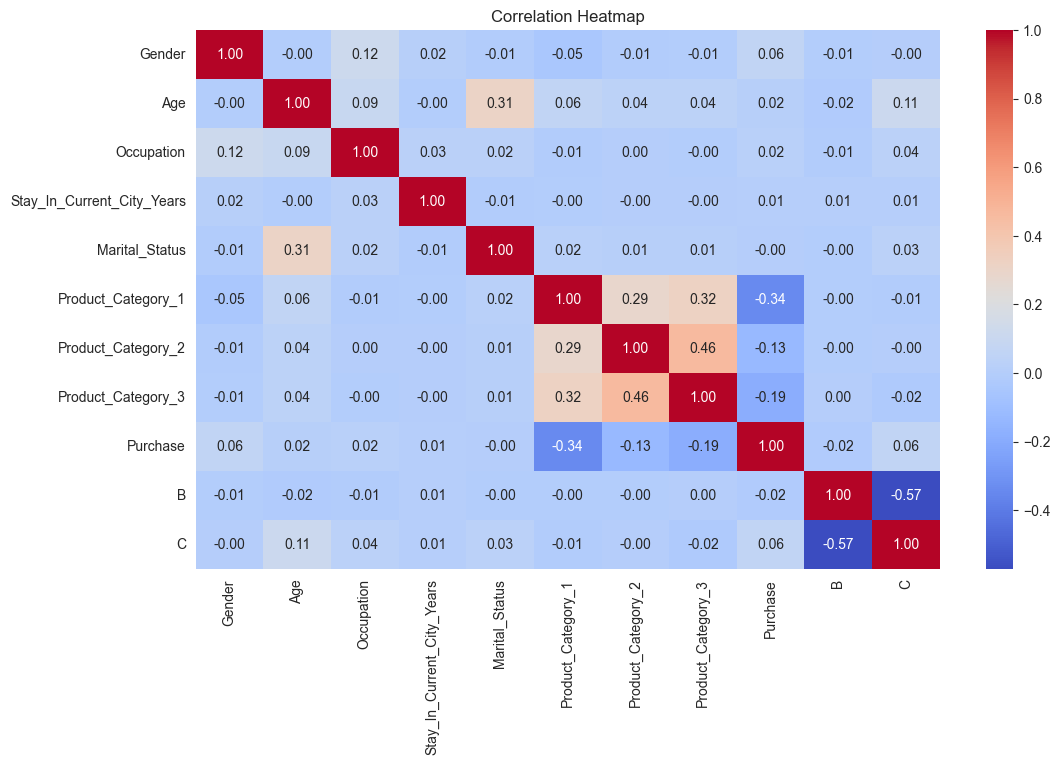

In [50]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

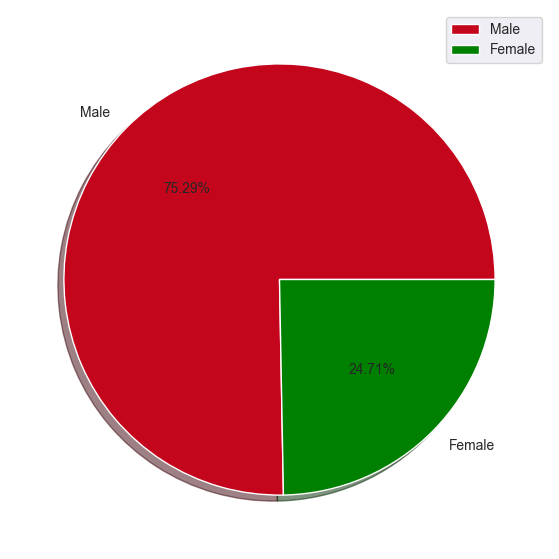

In [51]:
colors = ['#C4061D', 'green']
plt.pie(df['Gender'].value_counts() , labels = ['Male' , 'Female'], colors = colors, shadow = True, autopct = '%.2f%%')
plt.axis('off')
plt.legend()
plt.show()

In [52]:
color_sets = [["#1f77b4", "#ff7f0e"],["#2ca02c", "#d62728"], ["#9467bd", "#8c564b"],["#17becf", "#e377c2"],["#bcbd22", "#7f7f7f"]]

<Axes: xlabel='Age', ylabel='Purchase'>

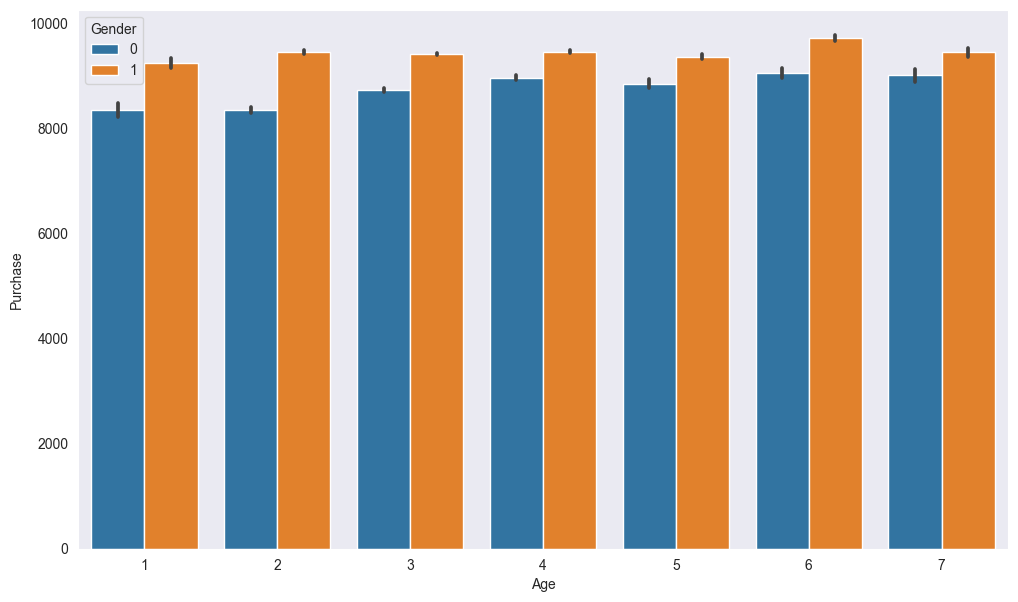

In [53]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df ,palette = color_sets[0])

### Observations :-
- Men Purchase more goods than Women.

<Axes: xlabel='Occupation', ylabel='Purchase'>

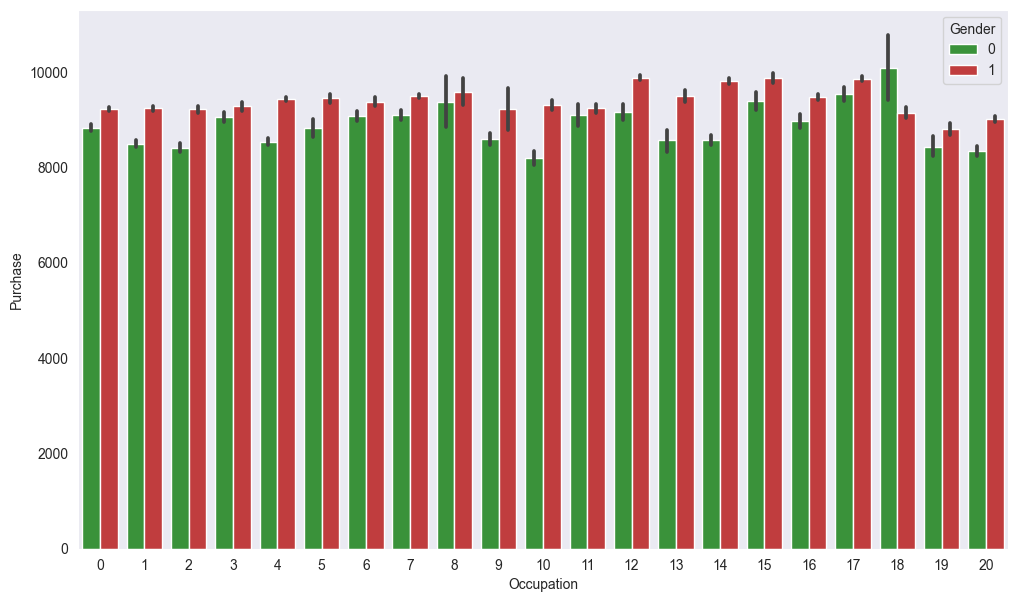

In [54]:
sns.barplot(x = 'Occupation' , y = 'Purchase' , hue = 'Gender' , data = df,palette = color_sets[1])

### Observations :-
- Almost Every Occupation has Uniform Purchase

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

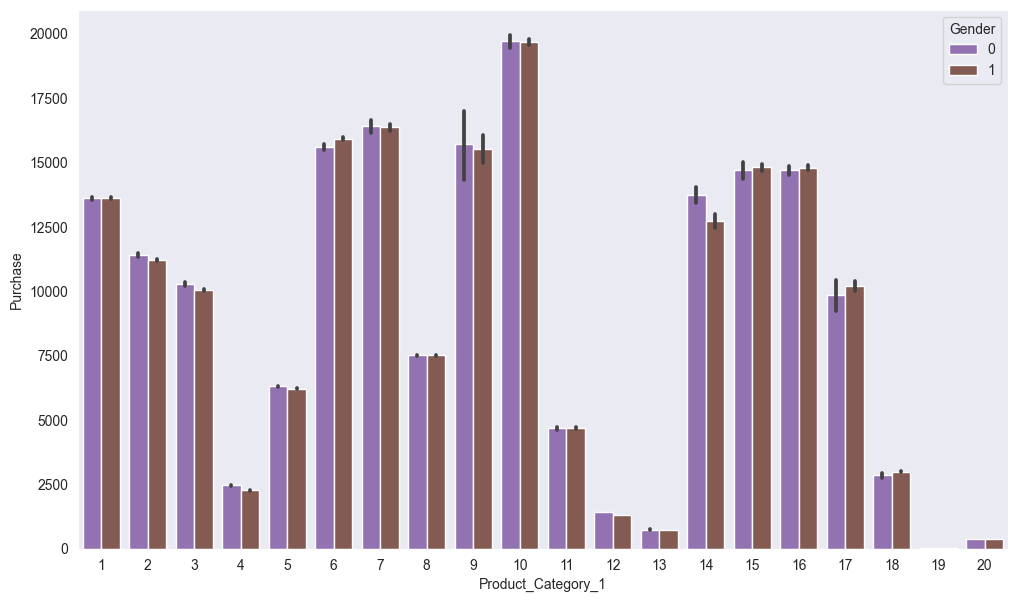

In [55]:
sns.barplot(x = 'Product_Category_1' , y = 'Purchase' , hue = 'Gender' , data = df,palette = color_sets[2])

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

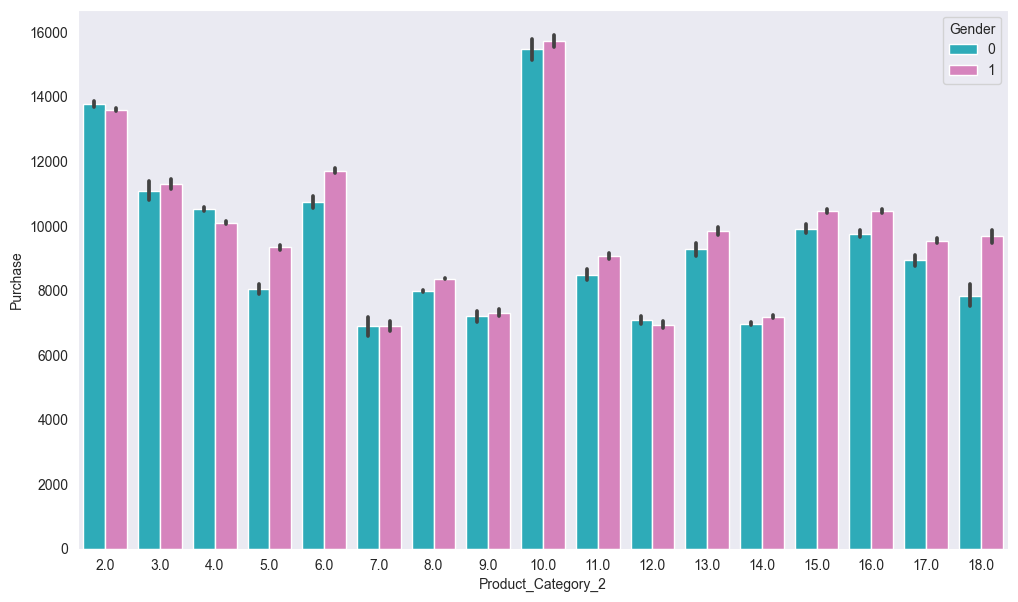

In [56]:
sns.barplot(x = 'Product_Category_2' , y = 'Purchase' , hue = 'Gender' , data = df ,palette = color_sets[3])

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

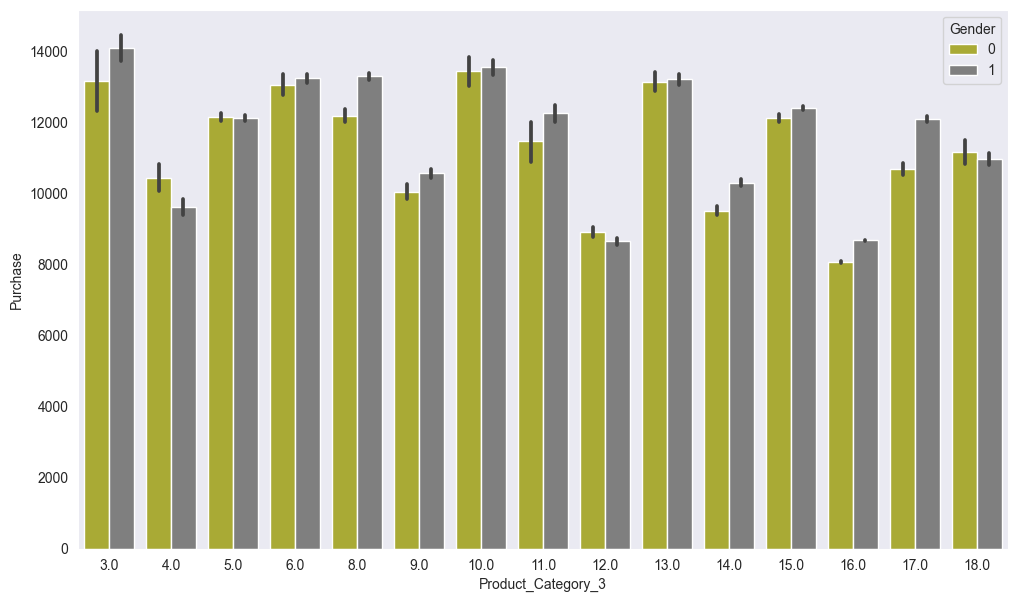

In [57]:
sns.barplot(x = 'Product_Category_3' , y = 'Purchase' , hue = 'Gender' , data = df,palette = color_sets[4])

In [58]:
# Feature Scaling
df_test = df[df['Purchase'].isnull()]

In [59]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [60]:
df_test.shape

(233599, 12)

In [61]:
df_train = df[~df['Purchase'].isnull()]

In [62]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [63]:
df_train.shape

(550068, 12)

In [64]:
X=df_train.drop('Purchase',axis=1)

In [65]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [66]:
X.shape

(550068, 11)

In [67]:
y = df_train['Purchase']

In [68]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [69]:
y.shape

(550068,)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [72]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model Training

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Print the evaluation results
print("Mean Squared Error (MSE) for linear Regression:", mse_lr)
print('Mean Absolute Error for linear Regression:', mae_lr)
print("R-squared (R2) for linear Regression:", r2_lr)

Mean Squared Error (MSE) for linear Regression: 21939163.32153542
Mean Absolute Error for linear Regression: 3577.237794185694
R-squared (R2) for linear Regression: 0.12948768560712398


In [75]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the Decision Tree regression model
dt_model = DecisionTreeRegressor(max_depth=5)  # You can adjust the 'max_depth' parameter
dt_model.fit(X_train, y_train)

# Make predictions using Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print the evaluation results for Decision Tree
print("Mean Squared Error (MSE) for Decision Tree:", mse_dt)
print('Mean Absolute Error for Decision Tree:', mae_dt)
print("R-squared (R2) for Decision Tree:", r2_dt)

Mean Squared Error (MSE) for Decision Tree: 10672107.765038338
Mean Absolute Error for Decision Tree: 2410.972611052821
R-squared (R2) for Decision Tree: 0.576547150233643


In [76]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5)  # You can adjust 'n_estimators' and 'max_depth'
rf_model.fit(X_train, y_train)

# Make predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the evaluation results for Random Forest
print("Mean Squared Error (MSE) for Random Forest:", mse_rf)
print('Mean Absolute Error for Random Forest:', mae_rf)
print("R-squared (R2) for Random Forest:", r2_rf)

Mean Squared Error (MSE) for Random Forest: 10859038.305231744
Mean Absolute Error for Random Forest: 2438.3367630029375
R-squared (R2) for Random Forest: 0.5691300334188582


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the Gradient Boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3)  # You can adjust 'n_estimators' and 'max_depth'
gb_model.fit(X_train, y_train)

# Make predictions using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics for Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Print the evaluation results for Gradient Boosting
print("Mean Squared Error (MSE) for Gradient Boosting:", mse_gb)
print('Mean Absolute Error for Gradient Boosting:', mae_gb)
print("R-squared (R2) for Gradient Boosting:", r2_gb)

Mean Squared Error (MSE) for Gradient Boosting: 8959621.29692486
Mean Absolute Error for Gradient Boosting: 2269.1604524248355
R-squared (R2) for Gradient Boosting: 0.6444959838731028


In [78]:
# Compare the results of all four models
print("\nComparison of Regression Models:")
print("================================")
print("Linear Regression:")
print("  Mean Squared Error (MSE):", mse_lr)
print("  Mean Absolute Error (MAE):", mae_lr)
print("  R-squared (R2):", r2_lr)


print("\nDecision Tree Regression:")
print("=========================")
print("  Mean Squared Error (MSE):", mse_dt)
print("  Mean Absolute Error (MAE):", mae_dt)
print("  R-squared (R2):", r2_dt)

print("\nRandom Forest Regression:")
print("=========================")
print("  Mean Squared Error (MSE):", mse_rf)
print("  Mean Absolute Error (MAE):", mae_rf)
print("  R-squared (R2):", r2_rf)

print("\nGradient Boosting Regression:")
print("=============================")
print("  Mean Squared Error (MSE):", mse_gb)
print("  Mean Absolute Error (MAE):", mae_gb)
print("  R-squared (R2):", r2_gb)


Comparison of Regression Models:
Linear Regression:
  Mean Squared Error (MSE): 21939163.32153542
  Mean Absolute Error (MAE): 3577.237794185694
  R-squared (R2): 0.12948768560712398

Decision Tree Regression:
  Mean Squared Error (MSE): 10672107.765038338
  Mean Absolute Error (MAE): 2410.972611052821
  R-squared (R2): 0.576547150233643

Random Forest Regression:
  Mean Squared Error (MSE): 10859038.305231744
  Mean Absolute Error (MAE): 2438.3367630029375
  R-squared (R2): 0.5691300334188582

Gradient Boosting Regression:
  Mean Squared Error (MSE): 8959621.29692486
  Mean Absolute Error (MAE): 2269.1604524248355
  R-squared (R2): 0.6444959838731028


## Gradient Boosting Regression is the Best Fitted Model